# 1

5. EDA
6. Desarrollo de modelos de machine learning
7. Comparacion de modelos 
8. Visualizacion del modelo 
9. Conclusiones y recomendaciones 
10. Referencias

### 🌪️ Proyecto de Predicción de Magnitud de Tornados con LSTM
- Fuente: kaggle.com
- URL: https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021
- Fecha: 30 de Abril del 2025

#### 🎯 Objetivo del Proyecto
Desarrollar un modelo de **Machine Learning** utilizando redes neuronales **LSTM** (*Long Short-Term Memory*) para predecir la magnitud de tornados en EE.UU.

#### 📁 Dataset Utilizado `us_tornado_dataset.csv`
**Contenido principal del dataset:**
- 📅 Fecha del evento
- 🗺️ Estado afectado (ubicación geográfica)
- 🏥 Número de heridos y fallecidos
- 📍 Coordenadas de inicio/fin (latitud, longitud)
- 📏 Longitud y ancho del tornado
- ⚡ Magnitud (Escala Fujita Mejorada - EF)

#### 🤖 Por qué LSTM?
| Característica | Beneficio para el Proyecto |
|---------------|---------------------------|
| 🕰️ Manejo de secuencias temporales | Ideal para analizar evolución histórica de tornados |
| 🧠 Memoria a largo plazo | Detecta patrones complejos en series de tiempo |
| 🌐 Capacidad espacial | Puede aprender de coordenadas geográficas |


### 0. Librerías

In [ ]:
# 1. Librerías básicas y manejo de datos
import pickle
import logging
import pandas as pd
import numpy as np

# 2. Visualización de datos
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.graph_objects as go
import folium

# 3. Preprocesamiento y feature engineering
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.pipeline import Pipeline

# 4. Modelos de Machine Learning
from sklearn.ensemble import (
    HistGradientBoostingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.tree import DecisionTreeClassifier

# 5. Evaluación de modelos
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    matthews_corrcoef,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance

# 6. Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical

logger = logging.getLogger()
logger.setLevel(logging.ERROR)

### 1. Introducción

En este proyecto desarrollaremos un modelo de aprendizaje automático utilizando redes neuronales LSTM (Long Short-Term Memory) para predecir la magnitud de tornados en Estados Unidos, basándonos en un conjunto de datos históricos llamado us_tornado_dataset.csv. Este dataset incluye información relevante sobre cada evento de tornado, como la fecha, el estado afectado, número de heridos y fallecidos, coordenadas de inicio y fin, longitud y ancho del tornado.

El objetivo principal es construir un modelo capaz de aprender patrones temporales y espaciales a partir de estos datos, permitiendo realizar predicciones más precisas sobre la magnitud de futuros tornados. Las redes LSTM son especialmente útiles para este tipo de problemas, ya que están diseñadas para trabajar con secuencias de datos y capturar relaciones de largo plazo, lo que resulta ideal en contextos donde la evolución temporal de los eventos es relevante.

### 2. Conceptos (Marco teórico)

#### 🌪️ Tornados: Definición, Clasificación e Impacto

#### ❓ ¿Qué es un tornado?
**Un tornado** es una columna de aire que gira violentamente desde una tormenta eléctrica hasta la superficie terrestre.  

**Características principales:**  
- Forma de embudo característica  
- Vientos extremadamente fuertes  
- Causa daños severos en su trayectoria  
- Varía en intensidad, tamaño y duración  

**Formación:**  
Requiere condiciones atmosféricas específicas:  
✔ Humedad  
✔ Inestabilidad del aire  
✔ Cizalladura del viento  

---

#### 📊 Clasificación: Escala Fujita Mejorada (EF)
Sustituyó en 2007 a la Escala Fujita original (1971) por mayor precisión.

| Categoría | Velocidad Viento | Daños |
|-----------|------------------|-------|
| **EF0** | 65-85 mph (105-137 km/h) | Leves (ramas rotas) |
| **EF1** | 86-110 mph (138-177 km/h) | Moderados (tejados dañados) |
| **EF2** | 111-135 mph (178-217 km/h) | Considerables (árboles arrancados) |
| **EF3** | 136-165 mph (218-266 km/h) | Graves (paredes derrumbadas) |
| **EF4** | 166-200 mph (267-322 km/h) | Devastadores (casas destruidas) |
| **EF5** | >200 mph (322+ km/h) | Increíbles (estructuras niveladas) |

---

#### 💰 Impacto Económico
**Factores clave:**  
- **Categoría del tornado** (EF3+ = mayor destrucción)  
- **Ubicación** (zonas urbanas = mayor costo)  

**Áreas afectadas:**  
- 🏠 Viviendas e infraestructuras  
- 🌾 Agricultura (cosechas/ganado)  
- 🏢 Negocios (interrupciones operativas)  
- 🚑 Respuesta de emergencia  

#### 📌 Ejemplos destacados (EE.UU.)
| Evento | Año | Daños (USD) | Categoría |
|--------|-----|-------------|-----------|
| Joplin, MO | 2011 | $2.8 mil millones | EF5 |
| Moore, OK | 2013 | $2 mil millones | EF5 |
| **Promedio anual (1996-2023)** | - | **$1.1 mil millones** | EF3-EF4 |  


> **Dato crítico:** Un EF2 en zona urbana puede costar más que un EF4 en área rural.

#### Algoritmo LSTM (Long Short-Term Memory)

##### 📌 Definición
**LSTM** es un tipo especial de Red Neuronal Recurrente (RNN) diseñada para manejar dependencias de **largo plazo** en datos secuenciales, resolviendo el problema del *vanishing gradient* (desvanecimiento del gradiente) de las RNN tradicionales.

#### 🧠 Estructura Clave
#### 1. **Celda de Memoria**
   - Almacena información relevante por largos períodos.

#### 2. **Tres Puertas Reguladoras**
| Puerta             | Función                                                                 |
|--------------------|-------------------------------------------------------------------------|
| **Forget Gate**    | Decide qué información se descarta de la celda de memoria.              |
| **Input Gate**     | Actualiza la celda con nueva información importante.                   |
| **Output Gate**    | Controla qué información pasa al siguiente paso en la secuencia.       |

#### 🚀 Aplicaciones Comunes
- 📈 Predicción de series temporales (mercado bursátil, clima)
- 💬 Procesamiento de Lenguaje Natural (traducción, chatbots)
- 🎤 Reconocimiento de voz y video

#### ✅ Ventajas
✔ Maneja secuencias más largas que RNN estándar  
✔ Evita el desvanecimiento del gradiente  
✔ Captura patrones temporales complejos

#### ⚙️ Ejemplo en Keras
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(10, 1)),  # Capa LSTM
    LSTM(units=32),
    Dense(1)  # Capa de salida
])
model.compile(optimizer='adam', loss='mse')

#### Diccionario de Datos


|Nombre|Descripción|Tipo|
|----|-----------|----|
|year|Año con 4 dígitos|Int|
|month|Mes (1-12)|Int|
|day|Día del mes|Int|
|date|Objeto datetime (ej. 2011-01-01)|Date|
|state|Estado donde se originó el tornado; abreviatura de 2 letras|String|
|magnitude|Escala Fujita mejorada para clasificar tornados|Int|
|injuries|Número de heridos durante el tornado|Int|
|fatalities|Número de fallecidos durante el tornado|Int|
|start_latitude|Latitud inicial en grados decimales|Float|
|start_longitude|Longitud inicial en grados decimales|Float|
|end_latitude|Latitud final en grados decimales|Float|
|end_longitude|Longitud final en grados decimales|Float|
|length|Longitud de la trayectoria en millas|Float|
|width|Ancho en yardas|Float|

Sources:
1. National Weather Service (NWS). (n.d.). Enhanced Fujita Scale (EF Scale). NOAA.
https://www.weather.gov/oun/efscale
2. Storm Prediction Center (SPC). (n.d.). The Enhanced Fujita Scale (EF Scale). NOAA.
https://www.spc.noaa.gov/faq/tornado/ef-scale.html
3. National Centers for Environmental Information (NCEI). (n.d.). Billion-Dollar Weather and Climate Disasters. NOAA.
https://www.ncei.noaa.gov/access/billions/
4. Federal Emergency Management Agency (FEMA). (n.d.). Tornadoes | Disaster Recovery Resources.
https://www.fema.gov/disaster-recovery-resources/tornadoes

### 3. Hipótesis

En este proyecto desarrollaremos un modelo de aprendizaje automático utilizando redes neuronales LSTM (Long Short-Term Memory) para predecir la magnitud de tornados en Estados Unidos, basándonos en un conjunto de datos históricos llamado us_tornado_dataset.csv. Este dataset incluye información relevante sobre cada evento de tornado, como la fecha, el estado afectado, número de heridos y fallecidos, coordenadas de inicio y fin, longitud y ancho del tornado.

El objetivo principal es construir un modelo capaz de aprender patrones temporales y espaciales a partir de estos datos, permitiendo realizar predicciones más precisas sobre la magnitud de futuros tornados. Las redes LSTM son especialmente útiles para este tipo de problemas, ya que están diseñadas para trabajar con secuencias de datos y capturar relaciones de largo plazo, lo que resulta ideal en contextos donde la evolución temporal de los eventos es relevante.

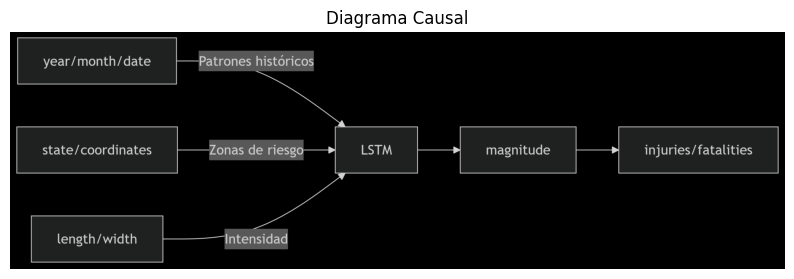

In [9]:
diag_causal = mpimg.imread('../diagrama_causal.png') 

# Mostrar imagen
plt.figure(figsize=(10, 6))  
plt.imshow(diag_causal)
plt.axis('off') 
plt.title('Diagrama Causal')
plt.show()

### 4. Preprocesamiento

In [16]:
import pandas as pd

df_raw = pd.read_csv('../data/raw/us_tornado_dataset_1950_2021.csv')
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67558 entries, 0 to 67557
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      67558 non-null  int64  
 1   mo      67558 non-null  int64  
 2   dy      67558 non-null  int64  
 3   date    67558 non-null  object 
 4   st      67558 non-null  object 
 5   mag     67558 non-null  int64  
 6   inj     67558 non-null  int64  
 7   fat     67558 non-null  int64  
 8   slat    67558 non-null  float64
 9   slon    67558 non-null  float64
 10  elat    67558 non-null  float64
 11  elon    67558 non-null  float64
 12  len     67558 non-null  float64
 13  wid     67558 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 7.2+ MB


In [17]:
df_raw.sample(16, random_state=2025)

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
44528,2003,6,4,2003-06-04,NM,0,0,0,36.6500,-104.1300,36.650,-104.130,0.50,100
25316,1985,8,31,1985-08-31,FL,1,0,0,28.2500,-82.7200,0.000,0.000,0.50,10
31651,1992,8,29,1992-08-29,FL,0,0,0,26.6800,-80.0500,0.000,0.000,0.10,10
23045,1983,4,23,1983-04-23,WA,0,0,0,46.9000,-119.0700,0.000,0.000,0.50,33
47201,2005,5,11,2005-05-11,IL,0,0,0,40.0000,-91.1700,40.000,-91.170,0.20,50
51002,2008,5,5,2008-05-05,TX,0,0,0,31.2800,-102.6500,31.310,-102.630,2.28,50
17846,1977,4,19,1977-04-19,TX,0,0,0,33.8500,-98.8300,0.000,0.000,0.10,10
50080,2007,6,29,2007-06-29,CO,0,0,0,38.0400,-105.4700,38.030,-105.470,1.00,75
24505,1984,7,5,1984-07-05,MA,1,0,0,42.5000,-72.3300,0.000,0.000,2.00,80
26125,1986,10,1,1986-10-01,WV,3,1,0,39.3000,-80.7800,0.000,0.000,1.00,200


In [18]:
#df_raw['mag'].count(-9)
(df_raw['mag'] == -9).sum()

np.int64(605)

In [20]:
(df_raw['len'] == 0).sum()

np.int64(123)

In [21]:
(df_raw['wid'] == 0).sum()

np.int64(473)

In [24]:
(df_raw['elat'] == 0).sum()

np.int64(26363)

In [25]:
(df_raw['elon'] == 0).sum()

np.int64(26363)

In [19]:
df_y = df_raw['mag']
df_y.value_counts()

mag
 0    31375
 1    22885
 2     9517
 3     2536
-9      605
 4      581
 5       59
Name: count, dtype: int64

Crear una equivalencia

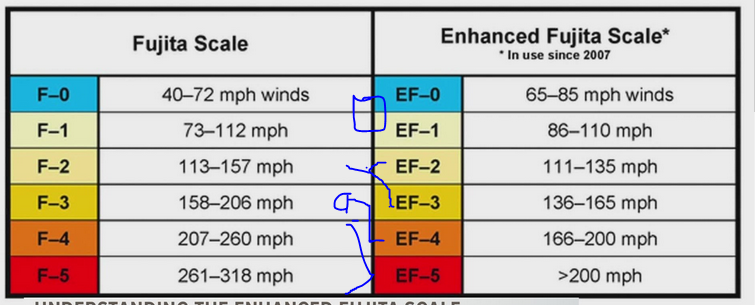

Adjusted Fujita = Fujita + Enhanced

- ADF0 =  40 - 134 mph  
- ADF1 = 113 - 135 mph  
- ADF2 = 136 - 157 mph  
- ADF3 = 158 - 206 mph  
- ADF4 =     > 207 mph  